by : ANDINA DYANING (180441100084)
     DEWI SILVIA (180441100097)




# KIVY

PENGERTIAN KIVY

Kivy merupakan library Python open source yang digunakan untuk mengembangkan aplikasi mobile dengan user inetrface alami (Natural User Interface). Kivy bisa berjalan pada platform Android, iOS, Linux, OS X dan Windows. Kivy berlisensi MIT. (Wikipedia)

CARA INSTALASI KIVY

Langkah 1.
mendownload aplikasi Python di sini, versi python ada 2 jenis yaitu versi python 3.5 dan versi python 2.7. Dalam proses instalasi ini saya menggunakan python 3.5.
Langkah 2.
setelah mendownload aplikasi python, langsung langkukan proses instalasi python dan tunggu proses instalasi python sampai selesai 
Langkah 3.
masuk ke CMD (Command Prompt) dengan cara menekan tombol Windows lalu ketik CMD atau dengan cara klik start, assesoris,  pilih commad promt. Maka akan masuk ke dalam kotak dialog Commad prompt. setelah masuk isikan coding sesuaikan seperti gambar yang ada di bawah ini.


SCRIPT CODE KIVY


import kivy

from kivy.app import App

from kivy.uix.gridlayout import GridLayout
from kivy.uix.boxlayout import BoxLayout
from kivy.uix.label import Label
from kivy.clock import Clock
from kivy.properties import NumericProperty, StringProperty
from kivy.uix.textinput import TextInput

from kivy.lang import Builder

from datetime import datetime, time

from kivy.core.audio import SoundLoader

def dateDiffInSeconds(date1, date2):
  timedelta = date2 - date1
  return timedelta.days * 24 * 3600 + timedelta.seconds

def daysHoursMinutesSecondsFromSeconds(seconds):
	minutes, seconds = divmod(seconds, 60)
	hours, minutes = divmod(minutes, 60)
	days, hours = divmod(hours, 24)
	return (days, hours, minutes, seconds)


class CrudeTimerGrid(GridLayout):
    countdown = StringProperty(datetime.today().strftime('%Y-%m-%d'))
    days = NumericProperty(0)
    hours = NumericProperty(0)
    minutes = NumericProperty(0)
    seconds = NumericProperty(0)
    date_last = datetime.today()
    has_bell = False
    message = StringProperty()
    sound = SoundLoader.load('Bel.mp3')

    def tick(self, *_):
        try:
          self.date_last = datetime.strptime(self.countdown, '%Y-%m-%d')
        except ValueError:
          return
        now = datetime.now()
        (self.days, self.hours, self.minutes, self.seconds) = daysHoursMinutesSecondsFromSeconds(dateDiffInSeconds(now, self.date_last))
        if (not self.has_bell and self.days < 0):
           self.has_bell = True
           self.ticktock()

    def start(self, *_):
        now = datetime.now()
        self.cb = Clock.schedule_interval(self.tick,1)


    def pause(self):
        if (self.cb):
            Clock.unschedule(self.cb)

    def ticktock(self):
         if self.sound:
             self.sound.play()
         #self.pause()
         self.message = "Selamat Hari Raya Idhul Fitri !"
         

    # incomplete code
    def text(self, *_):
        self.message = ""
        self.has_bell = False
        if self.sound:
             self.sound.stop()
        self.tick()
  

class CrudeTimerApp(App):
    def build(self):
        # Testing timer by initialising timer with 15 seconds
        return CrudeTimerGrid()

Builder.load_string('''
<CrudeTimerGrid>
    id: timer
    rows: 2
    countdown: cui.text
    # insert formatting here

    BoxLayout:
        Label:
            text: timer.message if timer.message else ("%d hari %d jam %d menit %d detik" % (timer.days, timer.hours, timer.minutes, timer.seconds))
            font_size: 32
            
    BoxLayout:

        Button:
            text: "Start"
            on_press: timer.start()

        Button:
            text: "Pause"
            on_press: timer.pause()

        TextInput:
            id: cui
            text: timer.countdown
            hint_text: "yyyy-mm-dd"
            on_text: timer.text()
    
''')

CrudeTimerApp().run()


HASIL RUN 
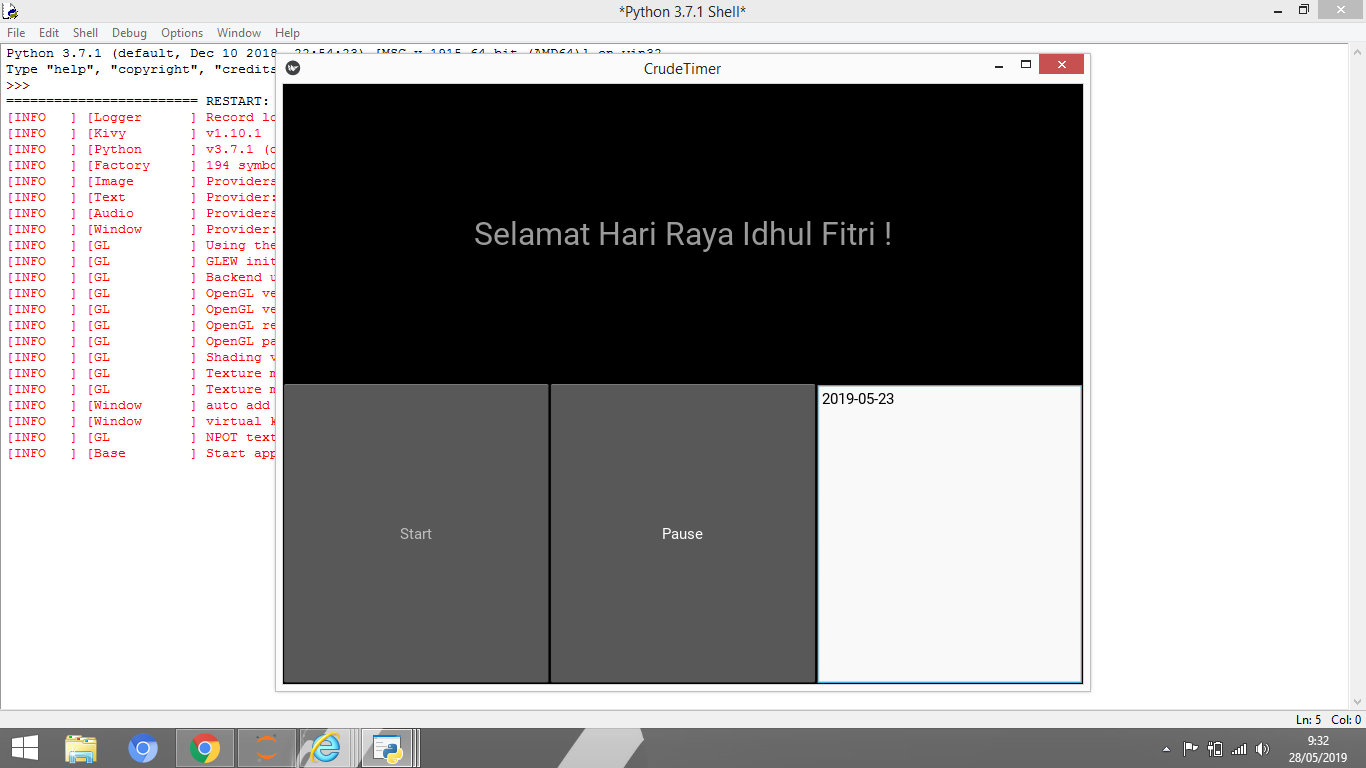


# PYGAME

PENGERTIAN PYGAME

Apa itu pygame?Pygame merupakan modul python yang dapat digunakan untuk pembentukan game.Untuk menggunakannnya   kita perlu menginstalnya terlebih dahulu.

CARA INSTALASI PYGAME

Langkah 1 : Cek versi python kalian.
Langkah 2 : Medownload atau mengunduh file instalasi pygame.
Langkah 3 : extract file hasil download.
Langkah 4 : Paste file yang sudah di copy.
Langkah 5 : copy paste folder pygame.
Langkah 6 : Finsih dan pengecekan.

SCRIPT CODE

# Tetris yang Sederhana
#
# Tombol:
#       Down - Bawah
# Left/Right - Geser kiri/kanan
#         Up - Putar searah jarum jam
#     Escape - Keluar Game
#          P - Berhenti sejenak
#     Return - Langsung taruh kebawah


from random import randrange as rand
import pygame, sys
from pygame.locals import *

# The configuration
KOTAK_PIXEL =  15 # pixel
JUMLAH_KOLOM = 10 # jumlah kolom
JUMLAH_BARIS = 22 # jumlah baris
FPS =          30
WAKTU_JATUH = 500 # milidetik per kotak

BLACK =       (0, 0, 0)
GRAY =        (35, 35, 35)
WHITE =       (255, 255, 255)

PALET = [
            (0  , 0  , 0  ), # Khususon Background
            (255, 5  , 5  ),
            (255, 150, 5  ),
            (255, 255, 5  ),
            (5  , 255, 5  ),
            (5  , 255, 150),
            (5  , 150, 255),
            (255, 5,   255),
            (35,  35,  35) # Khususon Background
        ]

LEN_TIPE_BALOK = 7

class Balok():
    bentuk = []
    warna = (0, 0, 0)
    posisi_x = 0
    posisi_y = 0
    tipe = 0

    def _init_(self, tipe):
        self.tipe = tipe
        self.bentuk = [
            #   ____
            #   |_  _|
            #     |__|
            [[1, 1, 1], [0, 1, 0]],
            #     __
            #   _|  _|
            #   |__|
            [[0, 2, 2], [2, 2, 0]],
            #   __
            #   |_  |_
            #     |__|
            [[3, 3, 0], [0, 3, 3]],
            #   __
            #   |  |__
            #   |__|
            [[4, 0, 0], [4, 4, 4]],
            #       __
            #   __|  |
            #   |__|
            [[0, 0, 5], [5, 5, 5]],
            #  ____
            # |____|
            #
            [[6, 6, 6, 6]],
            #   __
            #  |    |
            #  |__|
            [[7, 7], [7, 7]]
        ][tipe][:]

        self.warna = PALET[tipe + 1]
        self.posisi_x = int((JUMLAH_KOLOM - len(self.bentuk[0]))/2)
        self.posisi_y = 0

    def putar(self, board):
        """ Diputar 90 derajat kekanan"""
        # RUMUS: (x, y) => (-y, x)
        tmp = self.bentuk
        self.bentuk = [
            [ self.bentuk[y][x] for y in range(len(self.bentuk)) ]
            for x in range(len(self.bentuk[0]) - 1, -1, -1) ]

        if (board.cek_hit_board(self)):
            self.bentuk = tmp

class Papan():
    board = []
    background = []
    palet = PALET

    def _init_(self):
        self.background = [[ 8 if (x+y)%2==0 else 0 for x in range(JUMLAH_KOLOM)] for y in range(JUMLAH_BARIS)]

    def baru(self):
        # Board untuk collision
        self.board =  [ [ 0 ] * JUMLAH_KOLOM for y in range(JUMLAH_BARIS) ]
        # Karena paling bawah jelas harus nyentuh kan?
        self.board += [ [ 1 ] * JUMLAH_KOLOM ]

    def cek_hit_board(self, balok):
        """ Cek udah menyentuh bawah """
        off_x, off_y = (balok.posisi_x, balok.posisi_y)
        for cy, baris in enumerate(balok.bentuk):
            for cx, kotak in enumerate(baris):
                try:
                    if kotak and self.board[ cy + off_y ][ cx + off_x ]:
                        return True
                except IndexError:
                    return True
        return False

    def hapus_baris(self, baris):
        """ Hapus baris ke-'baris' """
        del self.board[baris]
        self.board.insert(0, [0] * JUMLAH_KOLOM)

    def join_board(self, balok):
        off_x, off_y =  (balok.posisi_x, balok.posisi_y)
        for cy, baris in enumerate(balok.bentuk):
            for cx, val in enumerate(baris):
                self.board[cy+off_y-1    ][cx+off_x] += val

    def cek_baris(self):
        cleared_JUMLAH_BARIS = 0
        while True:
            for i, baris in enumerate(self.board[:-1]):
                if 0 not in baris:
                    self.hapus_baris(i)
                    cleared_JUMLAH_BARIS += 1
                    break
            else:
                break
        return cleared_JUMLAH_BARIS

class TetrisApp(object):
    def _init_(self):
        pygame.init()
        pygame.key.set_repeat(250,25)

        self.width =  KOTAK_PIXEL * (JUMLAH_KOLOM+6) # Width window dalam px
        self.height = KOTAK_PIXEL * JUMLAH_BARIS  # Height window dalam px
        self.rlim =   KOTAK_PIXEL * JUMLAH_KOLOM # Pembatas horizontal dalam px

        self.default_font =  pygame.font.Font(
            pygame.font.get_default_font(), 12)

        self.board = Papan()
        self.next_balok = Balok(rand(LEN_TIPE_BALOK))

        self.screen = pygame.display.set_mode((self.width, self.height))
        pygame.event.set_blocked(pygame.MOUSEMOTION)
        self.jalankan_game()

    def masukkan_balok_baru(self):
        """ Jatuhkan balok baru """
        self.balok = self.next_balok
        self.next_balok = Balok(rand(LEN_TIPE_BALOK))

        if self.board.cek_hit_board(self.balok):
            self.selesai = True

    def jalankan_game(self):
        """ kick start game baru """
        self.board.baru()
        self.masukkan_balok_baru()
        self.level, self.skor, self.lines = 1, 0, 0

        pygame.time.set_timer(pygame.USEREVENT+1, WAKTU_JATUH)

    def pesan(self, msg, topleft):
        """ tampilkan teks """
        x,y = topleft
        for line in msg.splitlines():
            self.screen.blit( self.default_font.render(line, True, WHITE, BLACK), (x,y))
            y+=14

    def pesan_di_tengah(self, msg):
        """ tampilkan teks di tengah """
        for i, line in enumerate(msg.splitlines()):
            msg_image =  self.default_font.render(line, True,
                WHITE, BLACK)

            msgim_center_x, msgim_center_y = msg_image.get_size()
            msgim_center_x //= 2
            msgim_center_y //= 2

            self.screen.blit(msg_image, (
              self.width // 2-msgim_center_x,
              self.height // 2-msgim_center_y+i*22))

    def draw_matrix(self, matrix, offset):
        off_x, off_y  = offset
        for y, baris in enumerate(matrix):
            for x, val in enumerate(baris):
                if val:
                    pygame.draw.rect(
                        self.screen,
                        PALET[val],
                        pygame.Rect(
                            (off_x+x) * KOTAK_PIXEL,
                            (off_y+y) * KOTAK_PIXEL,
                            KOTAK_PIXEL, KOTAK_PIXEL), 0)

    def add_cl_lines(self, n):
        lineskors = [0, 40, 100, 300, 1200]
        self.lines += n
        self.skor += lineskors[n] * self.level
        if self.lines >= self.level*6:
            self.level += 1
            newdelay = 1000-50*(self.level-1)
            newdelay = 100 if newdelay < 100 else newdelay
            pygame.time.set_timer(pygame.USEREVENT+1, newdelay)

    def move(self, delta_x):
        if not self.selesai and not self.terjeda:
            new_x = self.balok.posisi_x + delta_x
            if new_x < 0:
                new_x = 0
            if new_x > JUMLAH_KOLOM - len(self.balok.bentuk[0]):
                new_x = JUMLAH_KOLOM - len(self.balok.bentuk[0])
            if not self.board.cek_hit_board(self.balok):
                self.balok.posisi_x = new_x

    def quit(self):
        """ bye bye """
        self.pesan_di_tengah("Keluar...")
        pygame.display.update()
        pygame.quit()
        sys.exit()

    def drop(self, manual):
        """ jatuhkan satu tingkat """
        if not self.selesai and not self.terjeda:
            self.skor += 1 if manual else 0 # +1 kalau inisiatif dari pemain
            self.balok.posisi_y += 1
            if self.board.cek_hit_board(self.balok):
                self.board.join_board(self.balok)
                self.masukkan_balok_baru()

                self.add_cl_lines(self.board.cek_baris())
                return True
        return False

    def insta_drop(self):
        """ Langsung jatuhkan balok """
        if not self.selesai and not self.terjeda:
            while(not self.drop(True)):
                pass

    def putar_balok(self):
        """ Putar balok """
        if not self.selesai and not self.terjeda:
            self.balok.putar(self.board)

    def toggle_pause(self):
        """ Jeda atau lanjutkan """
        self.terjeda = not self.terjeda

    def start_game(self):
        if self.selesai:
            self.jalankan_game()
            self.selesai = False

    def run(self):
        # Key mapping berdasarkan fungsi yang ada
        key_actions = {
            pygame.K_ESCAPE:    self.quit,
            pygame.K_LEFT:      lambda:self.move(-1),
            pygame.K_RIGHT:     lambda:self.move(+1),
            pygame.K_DOWN:      lambda:self.drop(True),
            pygame.K_UP:        self.putar_balok,
            pygame.K_p:         self.toggle_pause,
            pygame.K_SPACE:     self.start_game,
            pygame.K_RETURN:    self.insta_drop
        }

        self.selesai = False
        self.terjeda = False

        clock = pygame.time.Clock()
        while True:
            self.screen.fill(BLACK)
            if self.selesai:
                self.pesan_di_tengah("""Selesai!\nSkor Anda: %d\nTekan spasi untuk melanjutkan""" % self.skor)
            else:
                if self.terjeda:
                    self.pesan_di_tengah("Paused")
                else:
                    pygame.draw.line(self.screen,
                        WHITE,
                        (self.rlim+1, 0),
                        (self.rlim+1, self.height-1))
                    self.pesan("Selanjutnya:", (
                        self.rlim+KOTAK_PIXEL,
                        2))
                    self.pesan("Skor: %d\n\nLevel: %d\nBaris: %d" % (self.skor, self.level, self.lines),
                        (self.rlim+KOTAK_PIXEL, KOTAK_PIXEL*5))
                    self.draw_matrix(self.board.background, (0,0))
                    self.draw_matrix(self.board.board, (0,0))
                    self.draw_matrix(self.balok.bentuk,
                        (self.balok.posisi_x, self.balok.posisi_y))
                    self.draw_matrix(self.next_balok.bentuk,
                        (JUMLAH_KOLOM+1,2))

            pygame.display.update()

            for event in pygame.event.get():
                if event.type == pygame.USEREVENT+1:
                    self.drop(False)
                elif event.type == pygame.QUIT:
                    self.quit()
                elif event.type == pygame.KEYDOWN:
                    for key in key_actions:
                        if event.key == key:
                            key_actions[key]()

            clock.tick(FPS)

if _name_ == '_main_':
    App = TetrisApp()
    App.run()
    
HASIL RUN
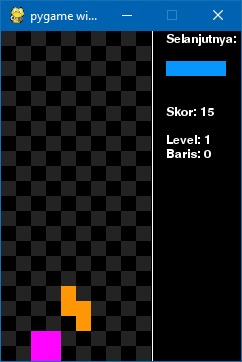